# Plots for the bachelor Thesis on Reservoir Computing

## 1. Explorative Analysis

### 1.1 NMSE vs Spectral radius for varying channel count and scale across all tasks (considering different input types)

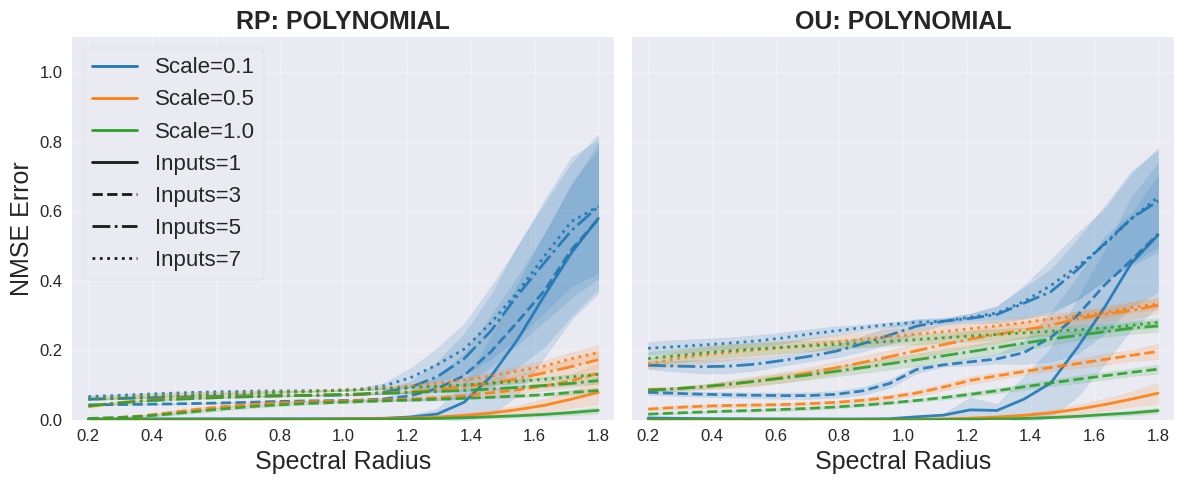

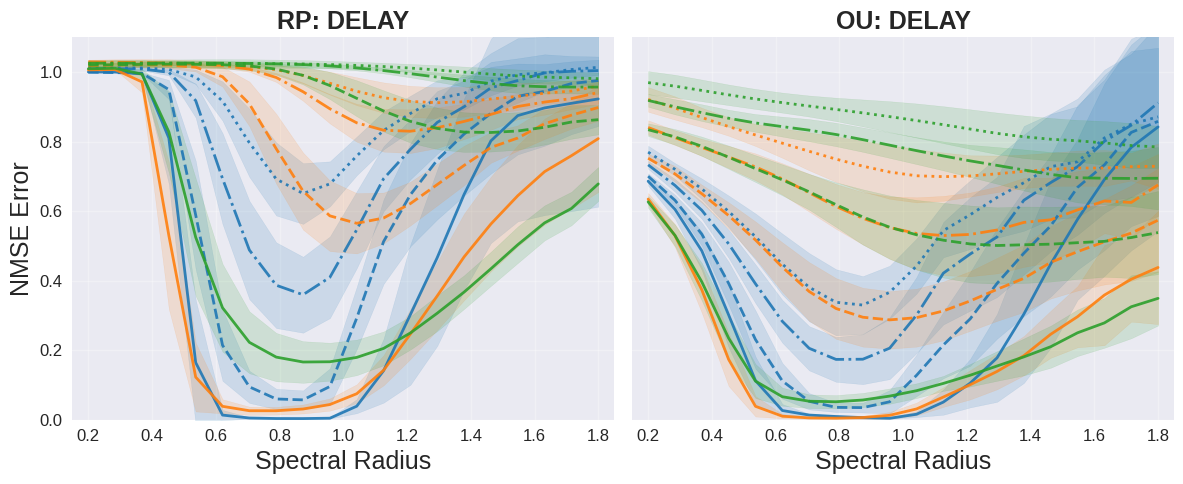

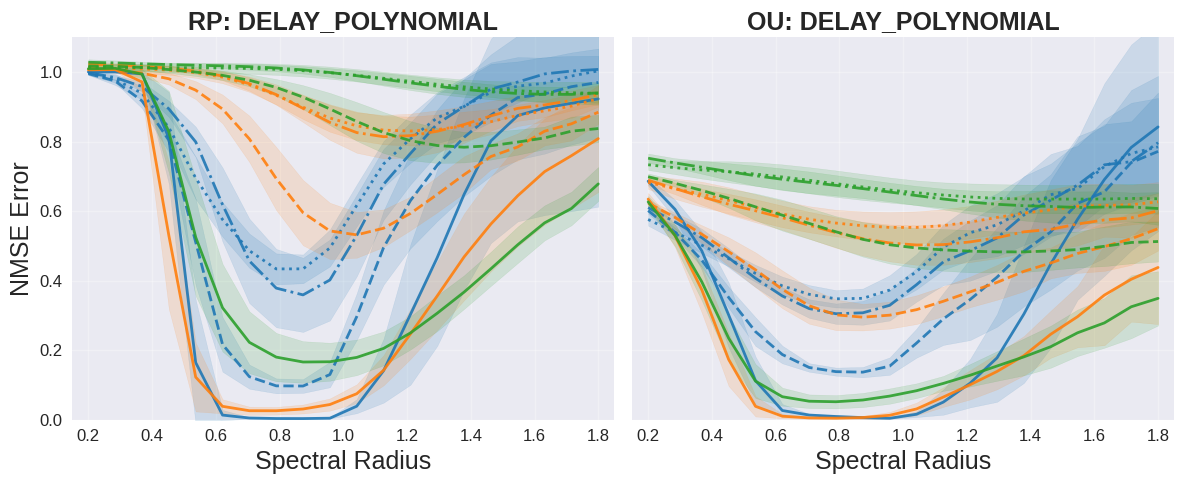

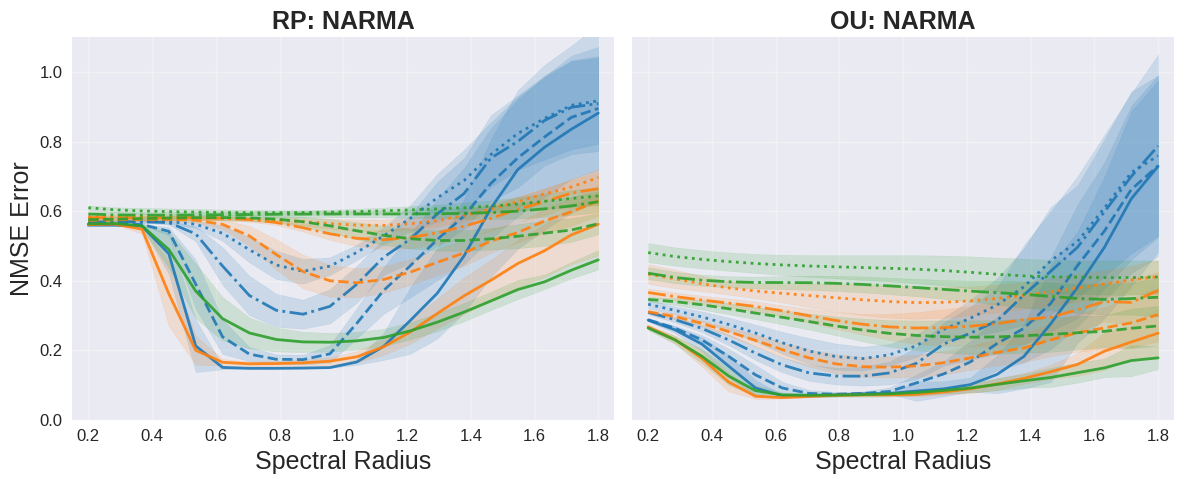

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Load CSVs ---
df_rp = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_RP_THESIS.csv")
df_ou = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_OU_THESIS.csv")

# --- Plot settings ---
plt.style.use('seaborn-v0_8')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # scale colors
linestyles = ['-', '--', '-.', ':']         # input/process count
scales = [0.1, 0.5, 1.0]
process_counts = [1, 3, 5, 7]

# Desired order for RP tasks
rp_task_order = ['polynomial', 'delay', 'delay_polynomial', 'narma']

# --- Plotting function ---
def plot_task(ax, df_task, title, show_xlabel=True, remove_ylabel=False):
    for s_idx, scale in enumerate(scales):
        for p_idx, proc_count in enumerate(process_counts):
            mask = (df_task['scale'] == scale) & (df_task['process_count'] == proc_count)
            data_subset = df_task[mask]

            if len(data_subset) == 0:
                continue

            grouped = data_subset.groupby('spectral_radius')['nmse_error'].agg(['mean', 'std']).reset_index()

            ax.plot(grouped['spectral_radius'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=2.0, alpha=0.9)

            ax.fill_between(grouped['spectral_radius'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)

    # Formatting
    ax.set_title(title, fontsize=18, fontweight='bold')

    if show_xlabel:
        ax.set_xlabel('Spectral Radius', fontsize=18)
    else:
        ax.set_xlabel('')

    if not remove_ylabel:
        ax.set_ylabel('NMSE Error', fontsize=18)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.85)
    ax.set_ylim(0, 1.1)

# --- Loop through tasks ---
for i, task in enumerate(rp_task_order):
    # Create a new figure with 1x2 layout for each task
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # one row, two columns

    # RP task (left)
    ax_rp = axes[0]
    df_task_rp = df_rp[df_rp['task'] == task].copy()
    plot_task(ax_rp, df_task_rp, f'RP: {task.upper()}', show_xlabel=True, remove_ylabel=False)

    # OU task (right, no y-axis)
    ax_ou = axes[1]
    df_task_ou = df_ou[df_ou['task'] == task].copy()
    plot_task(ax_ou, df_task_ou, f'OU: {task.upper()}', show_xlabel=True, remove_ylabel=True)

    # --- Legend inside left subplot ---
    if i == 0:
        color_legend = [Line2D([0], [0], color=colors[j], lw=2, label=f'Scale={scale}')
                        for j, scale in enumerate(scales)]
        line_legend = [Line2D([0], [0], color='k', lw=2, linestyle=linestyles[j], label=f'Inputs={proc_count}')
                    for j, proc_count in enumerate(process_counts)]

        ax_rp.legend(handles=color_legend + line_legend, loc='upper left',
                    fontsize=16, frameon=True)

    plt.tight_layout()

    # Save each task separately
    plt.savefig(f"THESIS_FIGURES/ESN_NMSE_{task.upper()}_RP_OU.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"THESIS_FIGURES/ESN_NMSE_{task.upper()}_RP_OU.pdf", dpi=300, bbox_inches='tight')
    plt.show()


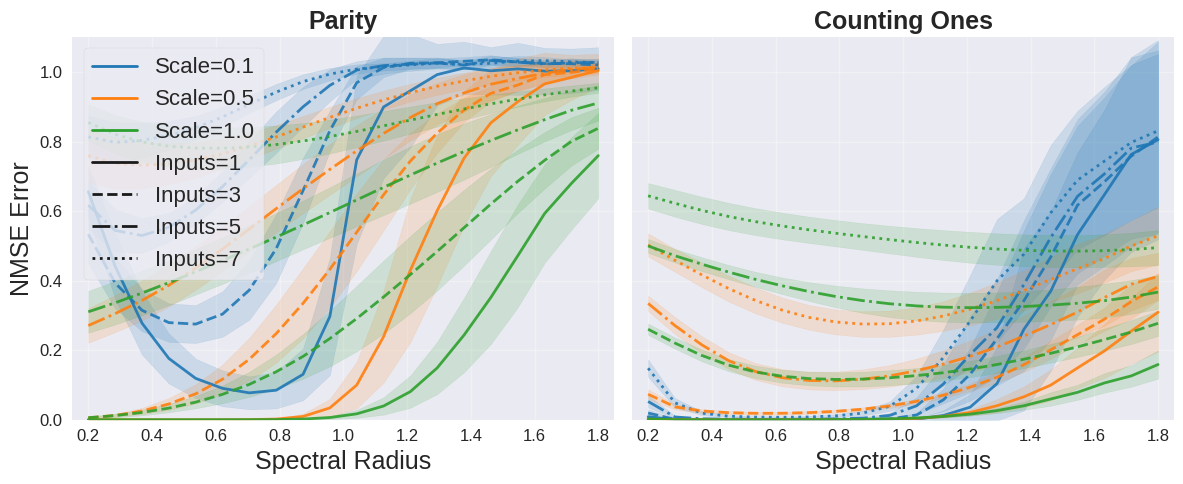

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Load CSV ---
df_binary = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_BINARY_THESIS.csv")

# --- Plot settings ---
plt.style.use('seaborn-v0_8')
binary_tasks = ["parity", "counting_task"]
task_titles = {"parity": "Parity", "counting_task": "Counting Ones"}

scales = [0.1, 0.5, 1.0]
process_counts = [1, 3, 5, 7]  # matches input_dim / process_count
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # scale colors
linestyles = ['-', '--', '-.', ':']          # input/process count

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# --- Plotting function ---
def plot_binary_task(ax, df_task, title, remove_ylabel=False):
    for s_idx, scale in enumerate(scales):
        for p_idx, proc_count in enumerate(process_counts):
            df_subset = df_task[(df_task['scale'] == scale) & (df_task['process_count'] == proc_count)]
            if len(df_subset) == 0:
                continue

            grouped = df_subset.groupby('spectral_radius')['nmse_error'].agg(['mean','std']).reset_index()

            ax.plot(grouped['spectral_radius'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=2.0, alpha=0.9)

            ax.fill_between(grouped['spectral_radius'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)

    # Formatting
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel('Spectral Radius', fontsize=18)

    if not remove_ylabel:
        ax.set_ylabel('NMSE Error', fontsize=18)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.85)
    ax.set_ylim(0, 1.1)


# --- Plot tasks ---
for i, task in enumerate(binary_tasks):
    df_task = df_binary[df_binary['task'] == task]
    plot_binary_task(axes[i], df_task, task_titles[task], remove_ylabel=(i == 1))


# --- Simplified legend inside left subplot ---
color_legend = [Line2D([0], [0], color=colors[i], lw=2, label=f'Scale={scale}') 
                for i, scale in enumerate(scales)]
line_legend = [Line2D([0], [0], color='k', lw=2, linestyle=linestyles[i], label=f'Inputs={proc_count}')
               for i, proc_count in enumerate(process_counts)]

axes[0].legend(handles=color_legend + line_legend, loc='upper left',
               fontsize=16, frameon=True)


plt.tight_layout()

# --- Save figure ---
plt.savefig("THESIS_FIGURES/ESN_NMSE_BINARY.png", dpi=300, bbox_inches='tight')
plt.savefig("THESIS_FIGURES/ESN_NMSE_BINARY.pdf", dpi=300, bbox_inches='tight')
plt.show()


### 1.2 NMSE vs scale for varying channel count and spectral radius across all tasks (considering different input types)

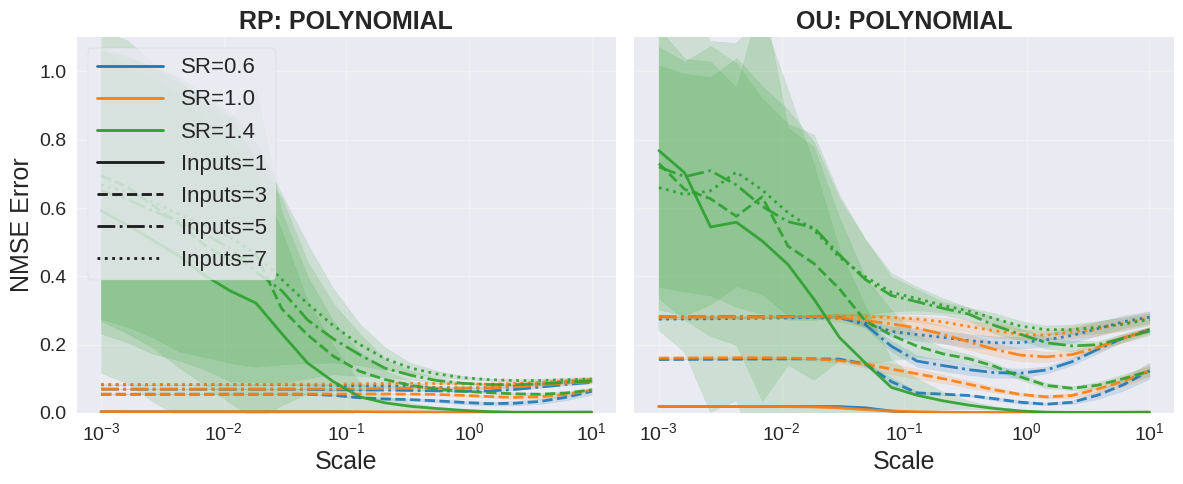

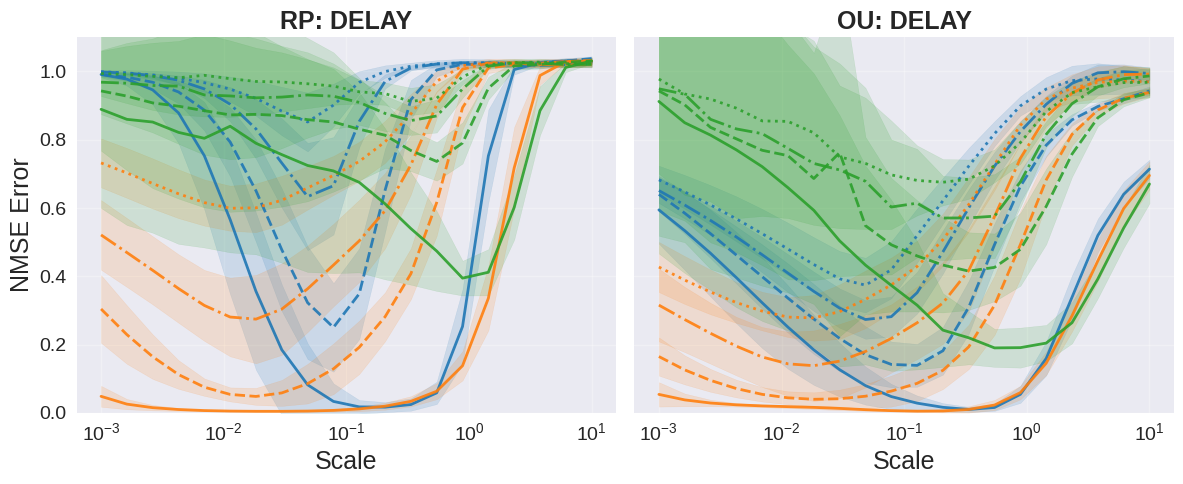

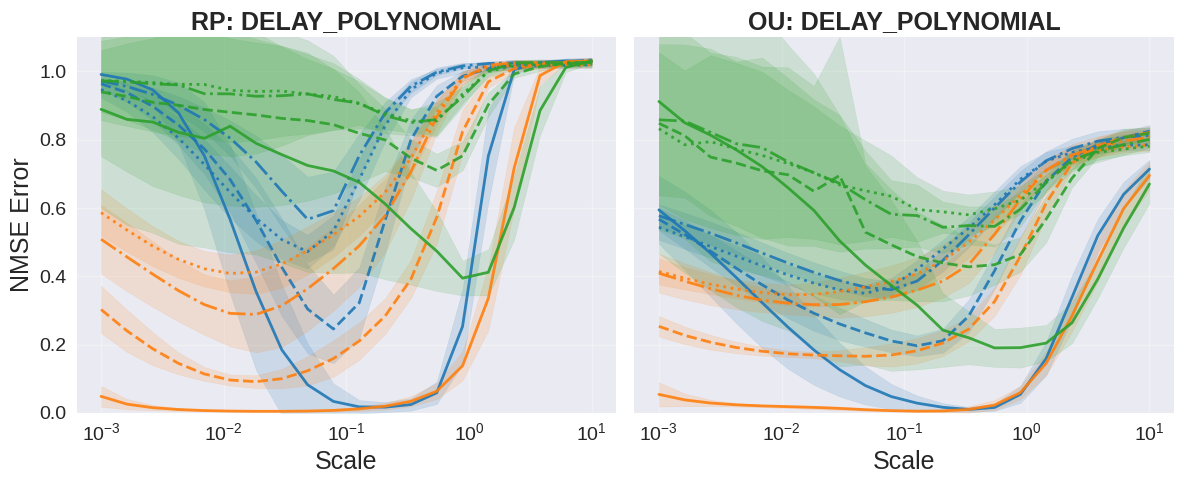

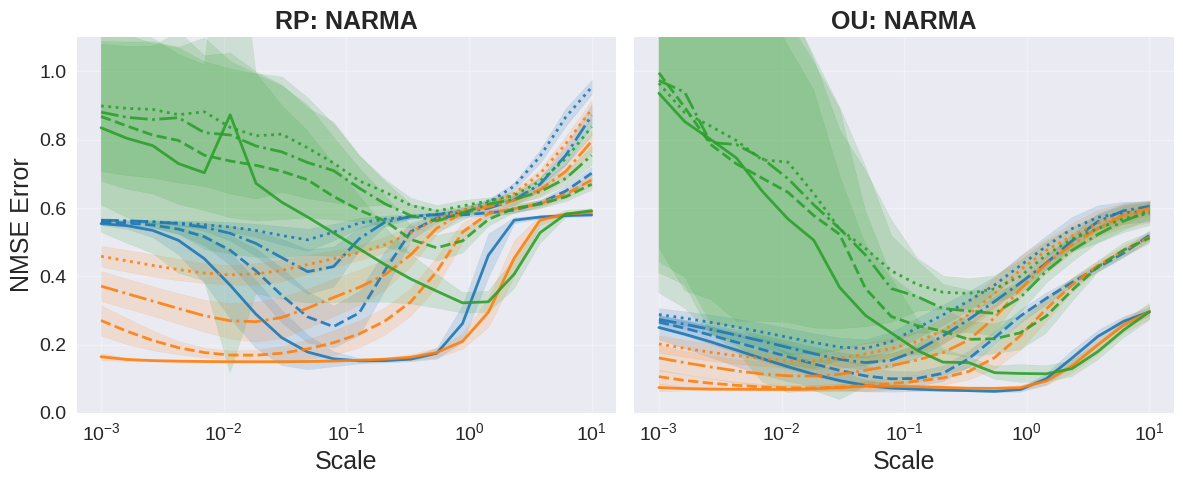

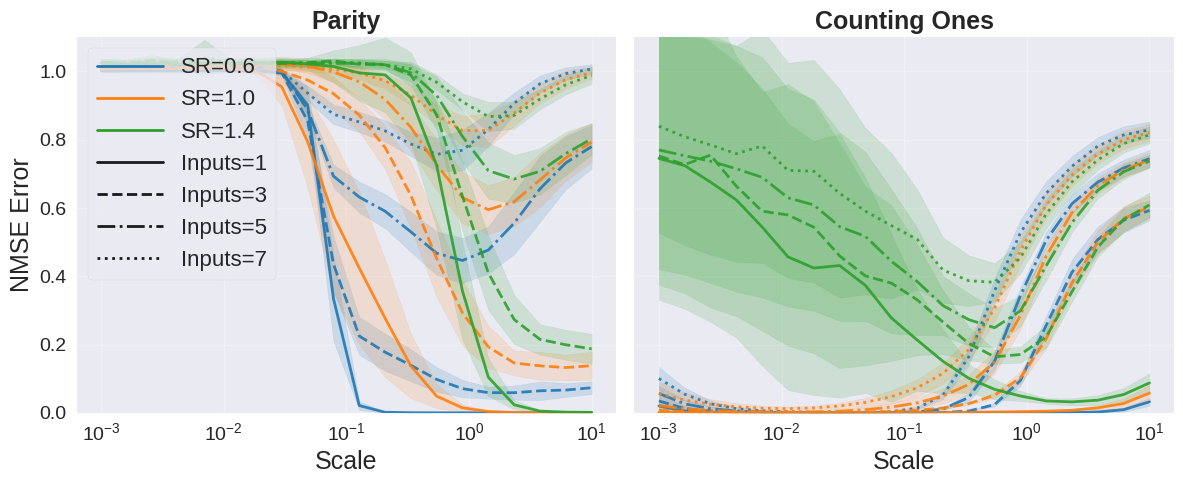

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Load CSVs for scale sweep ---
df_rp = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_RP_THESIS_SCALING.csv")
df_ou = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_OU_THESIS_SCALING.csv")
df_binary = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_BINARY_THESIS_SCALING.csv")

plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']   # spectral radius colors
linestyles = ['-', '--', '-.', ':']          # process counts
process_counts = [1, 3, 5, 7]
spectral_radii = [0.6, 1.0, 1.4]

# font constants for thesis figures
TITLE_FONTSIZE = 18
LABEL_FONTSIZE = 18
TICK_FONTSIZE = 14
LEGEND_FONTSIZE = 16

# --- RP/OU Tasks ---
rp_task_order = ['polynomial', 'delay', 'delay_polynomial', 'narma']

def plot_task_scale_x(ax, df_task, title, show_xlabel=True, remove_ylabel=False):
    for s_idx, rho in enumerate(spectral_radii):
        for p_idx, proc_count in enumerate(process_counts):
            mask = (df_task['spectral_radius'] == rho) & (df_task['process_count'] == proc_count)
            data_subset = df_task[mask]
            if len(data_subset) == 0:
                continue
            grouped = data_subset.groupby('scale')['nmse_error'].agg(['mean','std']).reset_index()
            ax.plot(grouped['scale'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=2.0, alpha=0.9)
            ax.fill_between(grouped['scale'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)
    
    ax.set_xscale('log')
    ax.set_title(title, fontsize=TITLE_FONTSIZE, fontweight='bold')

    if show_xlabel:
        ax.set_xlabel('Scale', fontsize=LABEL_FONTSIZE)
    else:
        ax.set_xlabel('')  # no label, tick numbers remain

    if not remove_ylabel:
        ax.set_ylabel('NMSE Error', fontsize=LABEL_FONTSIZE)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.1)

# --- Plot each RP/OU task as its own 1×2 figure ---
for i, task in enumerate(rp_task_order):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # RP task (left)
    ax_rp = axes[0]
    df_task_rp = df_rp[df_rp['task'] == task].copy()
    plot_task_scale_x(ax_rp, df_task_rp, f'RP: {task.upper()}', show_xlabel=True, remove_ylabel=False)

    # OU task (right, no y-axis)
    ax_ou = axes[1]
    df_task_ou = df_ou[df_ou['task'] == task].copy()
    plot_task_scale_x(ax_ou, df_task_ou, f'OU: {task.upper()}', show_xlabel=True, remove_ylabel=True)

    # --- Legend only for the first block ---
    if i == 0:
        color_legend = [Line2D([0],[0],color=colors[j], lw=2, label=f'SR={rho}') 
                        for j, rho in enumerate(spectral_radii)]
        line_legend = [Line2D([0],[0],color='k', lw=2, linestyle=linestyles[j], label=f'Inputs={proc_count}') 
                       for j, proc_count in enumerate(process_counts)]
        ax_rp.legend(handles=color_legend + line_legend, loc='upper left',
                     fontsize=LEGEND_FONTSIZE, frameon=True, handlelength=3)

    plt.tight_layout()
    plt.savefig(f"THESIS_FIGURES/ESN_NMSE_{task.upper()}_RP_OU_SCALING.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"THESIS_FIGURES/ESN_NMSE_{task.upper()}_RP_OU_SCALING.pdf", dpi=300, bbox_inches='tight')
    plt.show()


# --- Binary Tasks ---
binary_tasks = ["parity", "counting_task"]
task_titles = {"parity": "Parity", "counting_task": "Counting Ones"}

def plot_binary_task_scale_x(ax, df_task, title, remove_ylabel=False):
    for s_idx, rho in enumerate(spectral_radii):
        for p_idx, proc_count in enumerate(process_counts):
            df_subset = df_task[(df_task['spectral_radius'] == rho) & (df_task['process_count'] == proc_count)]
            if len(df_subset) == 0:
                continue
            grouped = df_subset.groupby('scale')['nmse_error'].agg(['mean','std']).reset_index()
            ax.plot(grouped['scale'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=2.0, alpha=0.9)
            ax.fill_between(grouped['scale'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)

    ax.set_xscale('log')
    ax.set_title(title, fontsize=TITLE_FONTSIZE, fontweight='bold')
    ax.set_xlabel('Scale', fontsize=LABEL_FONTSIZE)

    if not remove_ylabel:
        ax.set_ylabel('NMSE Error', fontsize=LABEL_FONTSIZE)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.1)

# --- Make 1×2 binary figure ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for i, task in enumerate(binary_tasks):
    df_task = df_binary[df_binary['task'] == task]
    plot_binary_task_scale_x(axes[i], df_task, task_titles[task], remove_ylabel=(i==1))

# Legend for binary tasks
color_legend = [Line2D([0],[0],color=colors[j], lw=2, label=f'SR={rho}') 
                for j, rho in enumerate(spectral_radii)]
line_legend = [Line2D([0],[0],color='k', lw=2, linestyle=linestyles[j], label=f'Inputs={proc_count}') 
               for j, proc_count in enumerate(process_counts)]
axes[0].legend(handles=color_legend + line_legend, loc='upper left',
               fontsize=LEGEND_FONTSIZE, frameon=True, handlelength=3)

plt.tight_layout()
plt.savefig("THESIS_FIGURES/ESN_NMSE_BINARY_SCALING.png", dpi=300, bbox_inches='tight')
plt.savefig("THESIS_FIGURES/ESN_NMSE_BINARY_SCALING.pdf", dpi=300, bbox_inches='tight')
plt.show()


### 1.3 NMSE vs Spectral radius for varying channel count and scale across all tasks (considering different input types) using a sparse input mapping

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Load CSVs ---
df_rp = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_RP_THESIS_SPARSE.csv")
df_ou = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_OU_THESIS_SPARSE.csv")

# --- Plot settings ---
plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # scale colors
linestyles = ['-', '--', '-.', ':']          # input/process count
scales = [0.1, 0.5, 1.0]
process_counts = [1, 3, 5, 7]

# Desired order for RP tasks
rp_task_order = ['polynomial', 'delay', 'delay_polynomial', 'narma']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

# --- Plotting function ---
def plot_task(ax, df_task, title):
    for s_idx, scale in enumerate(scales):
        for p_idx, proc_count in enumerate(process_counts):
            mask = (df_task['scale'] == scale) & (df_task['process_count'] == proc_count)
            data_subset = df_task[mask]
            if len(data_subset) == 0:
                continue
            grouped = data_subset.groupby('spectral_radius')['nmse_error'].agg(['mean', 'std']).reset_index()
            ax.plot(grouped['spectral_radius'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=1.5, alpha=0.8)
            ax.fill_between(grouped['spectral_radius'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Spectral Radius', fontsize=10)
    ax.set_ylabel('NMSE Error', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.85)

# --- Loop through tasks ---
for i, task in enumerate(rp_task_order):
    # RP task (left column)
    ax_rp = axes[i*2]
    df_task_rp = df_rp[df_rp['task'] == task].copy()
    plot_task(ax_rp, df_task_rp, f'RP: {task.upper()}')

    # OU task (right column)
    ax_ou = axes[i*2 + 1]
    df_task_ou = df_ou[df_ou['task'] == task].copy()
    plot_task(ax_ou, df_task_ou, f'OU: {task.upper()}')

# --- Simplified legend inside upper-left subplot ---
color_legend = [Line2D([0], [0], color=colors[i], lw=2, label=f'Scale={scale}') 
                for i, scale in enumerate(scales)]
line_legend = [Line2D([0], [0], color='k', lw=2, linestyle=linestyles[i], label=f'Inputs={proc_count}')
               for i, proc_count in enumerate(process_counts)]
axes[0].legend(handles=color_legend + line_legend, loc='upper left', fontsize=10, frameon=True)

plt.tight_layout()

# --- Save figure ---
#plt.savefig("CSVS/ESN_NMSE_RP_OU.png", dpi=300, bbox_inches='tight')
#plt.savefig("CSVS/ESN_NMSE_RP_OU.pdf", dpi=300, bbox_inches='tight')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../THESIS_CSV/ALL_TASKS_NMSE_RP_THESIS_SPARSE.csv'

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Load CSV ---
df_binary = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_BINARY_THESIS_SPARSE.csv")

# --- Plot settings ---
plt.style.use('seaborn-v0_8')
binary_tasks = ["parity", "counting_task"]
task_titles = {"parity": "Parity", "counting_task": "Counting Ones"}

scales = [0.1, 0.5, 1.0]
process_counts = [1, 3, 5, 7]  # matches input_dim / process_count
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # scale colors
linestyles = ['-', '--', '-.', ':']          # input/process count

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plotting function ---
def plot_binary_task(ax, df_task, title):
    for s_idx, scale in enumerate(scales):
        for p_idx, proc_count in enumerate(process_counts):
            df_subset = df_task[(df_task['scale'] == scale) & (df_task['process_count'] == proc_count)]
            if len(df_subset) == 0:
                continue
            grouped = df_subset.groupby('spectral_radius')['nmse_error'].agg(['mean','std']).reset_index()
            ax.plot(grouped['spectral_radius'], grouped['mean'],
                     color=colors[s_idx], linestyle=linestyles[p_idx],
                     linewidth=1.5, alpha=0.8)
            ax.fill_between(grouped['spectral_radius'],
                             grouped['mean'] - grouped['std'],
                             grouped['mean'] + grouped['std'],
                             color=colors[s_idx], alpha=0.15)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Spectral Radius', fontsize=10)
    ax.set_ylabel('NMSE Error', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.85)

# --- Plot tasks ---
for i, task in enumerate(binary_tasks):
    df_task = df_binary[df_binary['task'] == task]
    plot_binary_task(axes[i], df_task, task_titles[task])

# --- Simplified legend inside left subplot ---
color_legend = [Line2D([0], [0], color=colors[i], lw=2, label=f'Scale={scale}') 
                for i, scale in enumerate(scales)]
line_legend = [Line2D([0], [0], color='k', lw=2, linestyle=linestyles[i], label=f'Inputs={proc_count}')
               for i, proc_count in enumerate(process_counts)]
axes[0].legend(handles=color_legend + line_legend, loc='upper left', fontsize=10, frameon=True)

plt.tight_layout()

# --- Save figure ---
#plt.savefig("CSVS/ESN_NMSE_BINARY.png", dpi=300, bbox_inches='tight')
#plt.savefig("CSVS/ESN_NMSE_BINARY.pdf", dpi=300, bbox_inches='tight')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../THESIS_CSV/ALL_TASKS_NMSE_BINARY_THESIS_SPARSE.csv'

### 2.1 Measures vs spectral radius for RP,OU and BINARY input

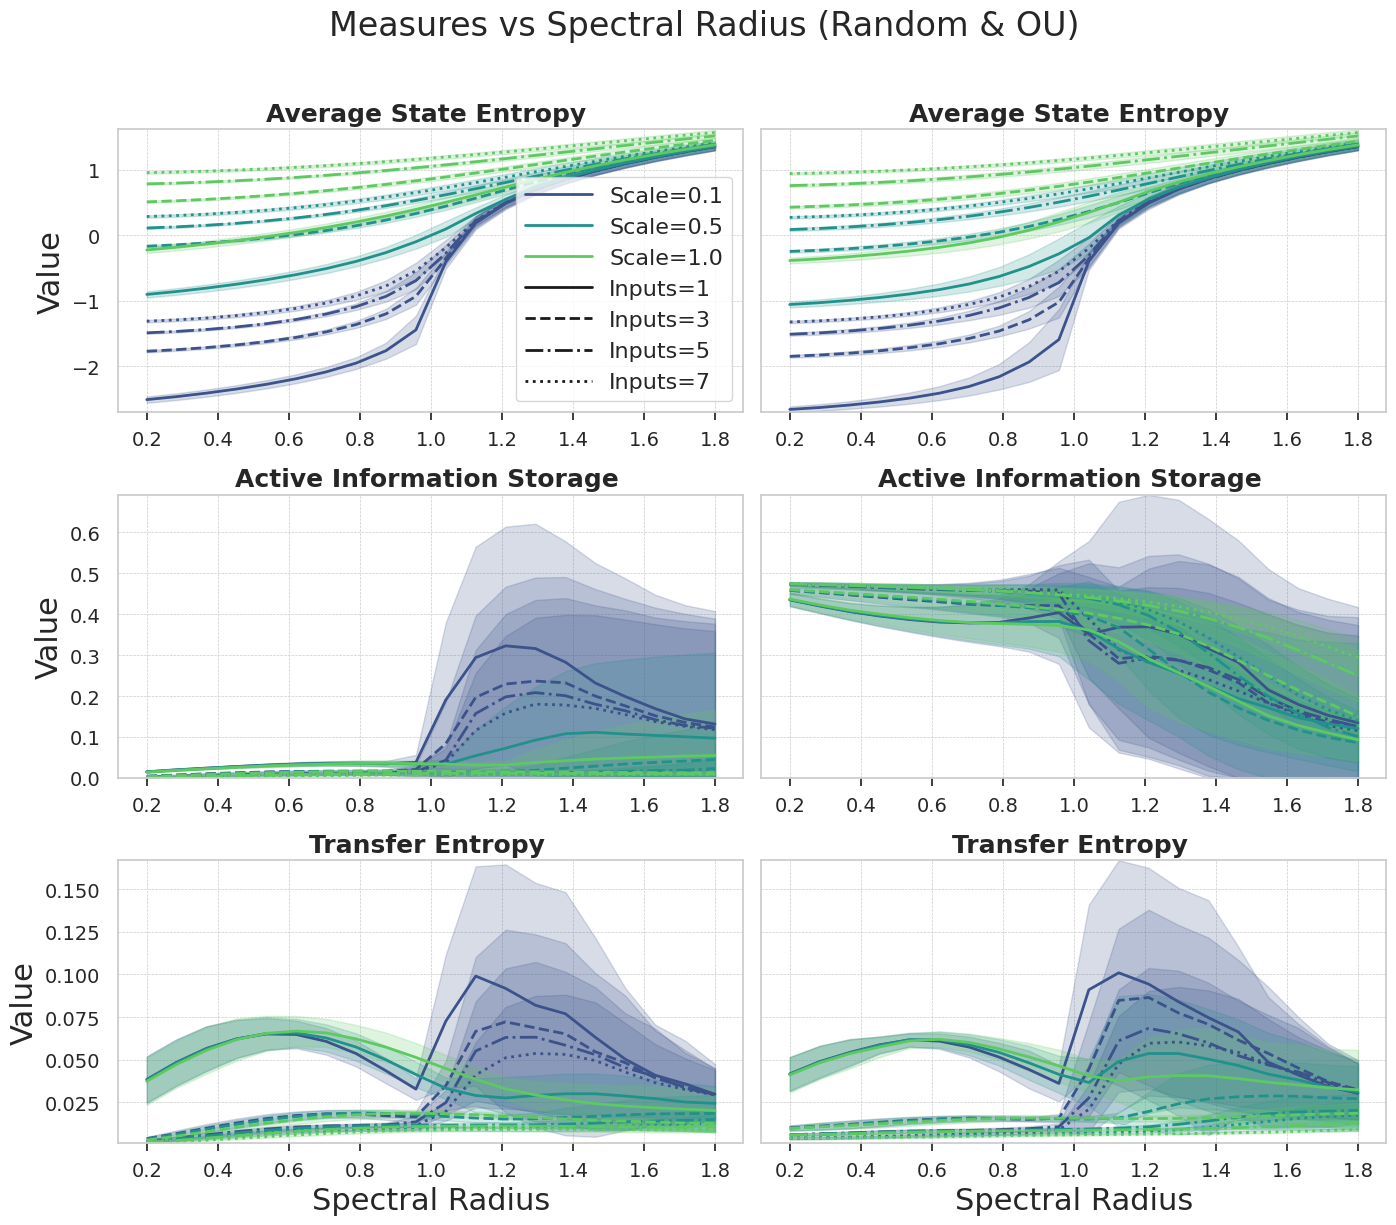

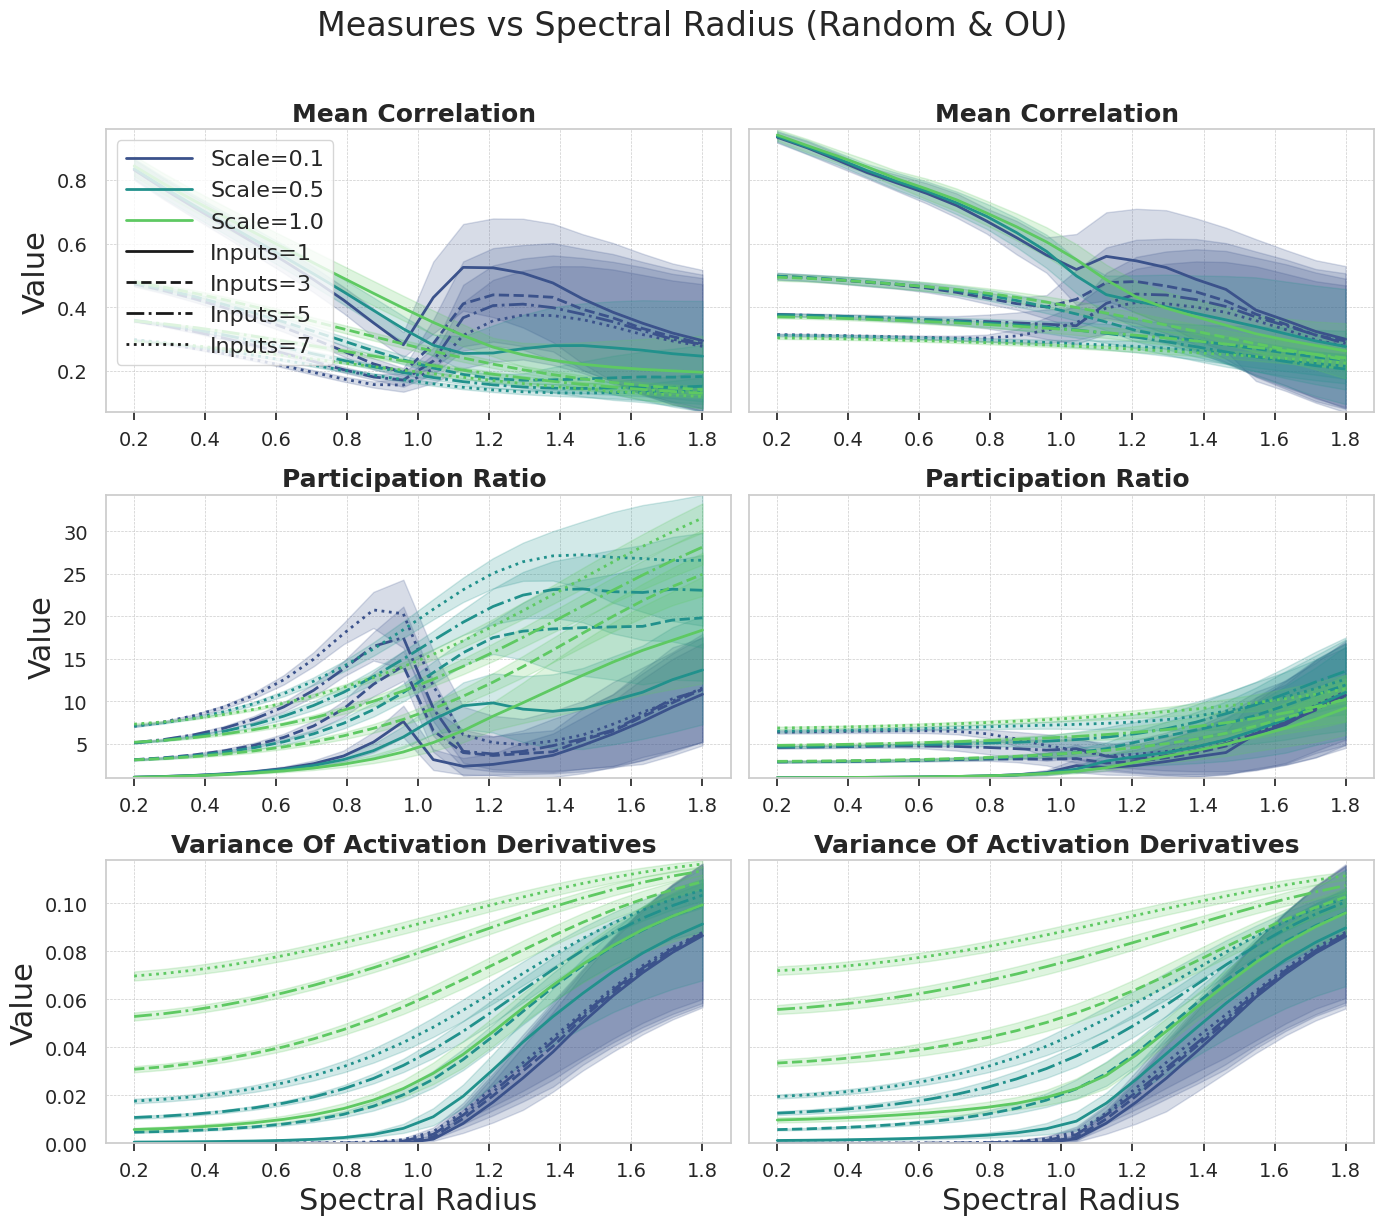

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import numpy as np

# --- Font constants for thesis figures ---
TITLE_FONTSIZE = 18
LABEL_FONTSIZE = 22 # Increased font size for x and y labels
TICK_FONTSIZE = 14
LEGEND_FONTSIZE = 16

def plot_measure_block(csv_file_ou, csv_file_rp, measures, block_name, location="upper left"):
    input_types = {
        'Random': pd.read_csv(csv_file_rp),
        'Ornstein-Uhlenbeck': pd.read_csv(csv_file_ou),
        
    }

    scales = sorted(input_types['Ornstein-Uhlenbeck']['scale'].unique())
    process_counts = sorted(input_types['Ornstein-Uhlenbeck']['process_count'].unique())
    spectral_radii = sorted(input_types['Ornstein-Uhlenbeck']['spectral_radius'].unique()) # Needed for new legend
    
    palette = sns.color_palette("viridis", n_colors=len(scales))
    line_styles = ['-', '--', '-.', ':']

    sns.set_theme(style="whitegrid")
    n_measures = len(measures)
    fig, axes = plt.subplots(n_measures, 2, figsize=(14, n_measures*4), sharex='col')
    
    for i, measure in enumerate(measures):
        # --- compute common ylim for this measure (OU + RP) ---
        measure_min = float('inf')
        measure_max = float('-inf')

        for j, (input_name, df_input) in enumerate(input_types.items()):
            ax = axes[i, j] if n_measures > 1 else axes[j]
            grouped = df_input.groupby(['process_count', 'scale', 'spectral_radius'])
            df_mean = grouped[measure].mean().reset_index()
            df_std  = grouped[measure].std().reset_index()

            for scale_idx, scale in enumerate(scales):
                for pc_idx, process_count in enumerate(process_counts):
                    subset_mean = df_mean[(df_mean['scale']==scale) & (df_mean['process_count']==process_count)]
                    subset_std  = df_std[(df_std['scale']==scale) & (df_std['process_count']==process_count)]

                    ax.plot(subset_mean['spectral_radius'], subset_mean[measure],
                            color=palette[scale_idx],
                            linestyle=line_styles[pc_idx % len(line_styles)],
                            linewidth=2.0)

                    if measure == 'average_state_entropy':
                        lower = subset_mean[measure] - subset_std[measure]
                    else:
                        lower = np.maximum(subset_mean[measure] - subset_std[measure], 0)
                    upper = subset_mean[measure] + subset_std[measure]

                    ax.fill_between(subset_mean['spectral_radius'], lower, upper,
                                    color=palette[scale_idx], alpha=0.2)

                    # update measure-specific min/max
                    measure_min = min(measure_min, lower.min())
                    measure_max = max(measure_max, upper.max())

            # Make title bold
            ax.set_title(f"{measure.replace('_',' ').title()} ", fontsize=TITLE_FONTSIZE, fontweight='bold')
            
            # Only add x-label on the last row
            if i == n_measures - 1:
                ax.set_xlabel("Spectral Radius", fontsize=LABEL_FONTSIZE)
            else:
                ax.set_xlabel("", fontsize=LABEL_FONTSIZE)
            
            ax.set_ylabel("Value", fontsize=LABEL_FONTSIZE)
            ax.tick_params(axis='both', labelsize=TICK_FONTSIZE)
            # Ensure x-ticks are visible on all rows
            ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
            ax.grid(True, linestyle='--', linewidth=0.5)

        # --- apply shared y-lims for OU vs RP pair ---
        for j in range(2):
            ax = axes[i, j] if n_measures > 1 else axes[j]
            ax.set_ylim(measure_min, measure_max)
            if j == 1:  # right column: remove y-axis label + ticks
                ax.set_ylabel("")
                ax.tick_params(axis='y', labelleft=False)
            else:  # left column: ensure "Value" label is visible
                ax.set_ylabel("Value", fontsize=LABEL_FONTSIZE)

    # --- Legend on top-left subplot, matching previous plot's style ---
    color_legend = [mlines.Line2D([], [], color=palette[k], lw=2, label=f'Scale={s}') 
                    for k, s in enumerate(scales)]
    line_legend = [mlines.Line2D([], [], color='k', lw=2, linestyle=line_styles[k], label=f'Inputs={pc}') 
                   for k, pc in enumerate(process_counts)]

    axes[0,0].legend(handles=color_legend + line_legend, loc=location,
                     fontsize=LEGEND_FONTSIZE, frameon=True, handlelength=3)


    fig.suptitle(f"Measures vs Spectral Radius (Random & OU)", fontsize=24, y=1.02)
    plt.tight_layout()

    out_dir = "THESIS_FIGURES"
    os.makedirs(out_dir, exist_ok=True)
    png_path = os.path.join(out_dir, f"3_1{block_name}_MEASURES_1.png")
    pdf_path = os.path.join(out_dir, f"3_1{block_name}_MEASURES_1.pdf")
    fig.savefig(png_path, dpi=300, bbox_inches='tight')
    fig.savefig(pdf_path, bbox_inches='tight')
    plt.show()
    
if __name__ == "__main__":
    csv_file_ou = "../THESIS_CSV/ALL_MEASURES_OU.csv"
    csv_file_rp = "../THESIS_CSV/ALL_MEASURES_RP.csv"

    block1_measures = ['average_state_entropy', 'active_information_storage', 'transfer_entropy']
    block2_measures = ['mean_correlation', 'participation_ratio', 'variance_of_activation_derivatives']

    plot_measure_block(csv_file_ou, csv_file_rp, block1_measures, "first", location="lower right")
    plot_measure_block(csv_file_ou, csv_file_rp, block2_measures, "second", location="upper left")

## 2.2 Measure vs Measure matrix, lower left triangle is for the Random Process, upper right triangle is for the Binary input

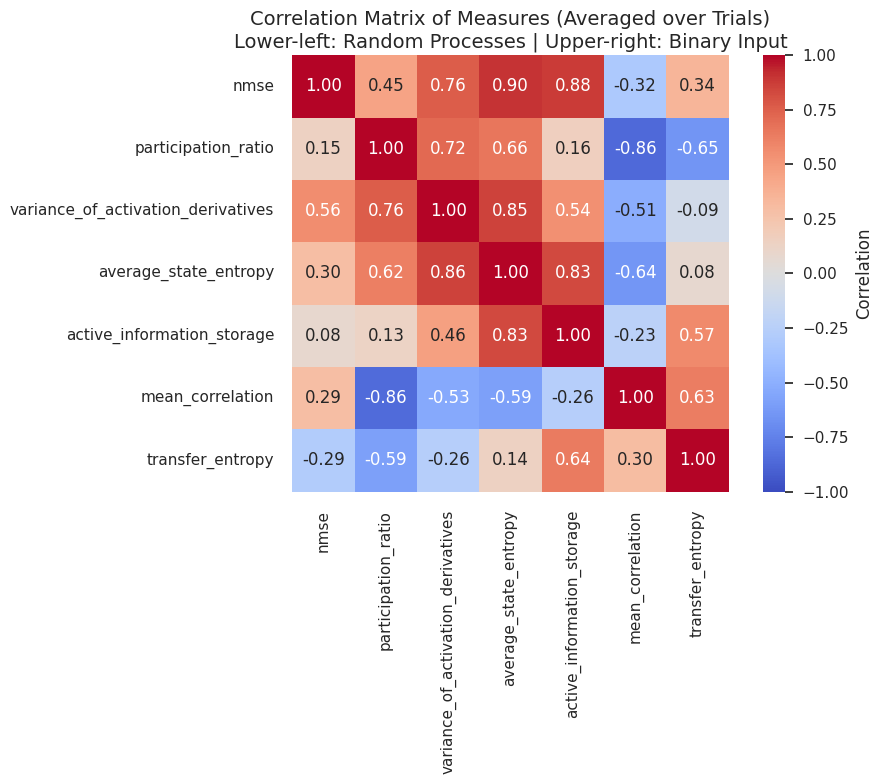

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
df_rp = pd.read_csv("../THESIS_CSV/ALL_MEASURES_CORR_RP.csv")
df_bin = pd.read_csv("../THESIS_CSV/ALL_MEASURES_CORR_BINARY.csv")

# List of measures to include
measure_cols = [
    'nmse', 
    'participation_ratio', 
    'variance_of_activation_derivatives',
    'average_state_entropy',
    'active_information_storage',
    'mean_correlation',
    'transfer_entropy'
]

# Average over all trials
df_rp_avg = df_rp.groupby('spectral_radius')[measure_cols].mean()
df_bin_avg = df_bin.groupby('spectral_radius')[measure_cols].mean()

# Compute correlation matrices
corr_rp = df_rp_avg.corr()
corr_bin = df_bin_avg.corr()

# Initialize combined matrix
combined_corr = np.full_like(corr_rp, np.nan)
n = len(measure_cols)

for i in range(n):
    for j in range(n):
        if i > j:  # lower-left triangle -> random process
            combined_corr[i, j] = corr_rp.iloc[i, j]
        elif i < j:  # upper-right triangle -> binary input
            combined_corr[i, j] = corr_bin.iloc[i, j]
        else:  # diagonal
            combined_corr[i, j] = 1.0

# Convert to DataFrame
combined_corr_df = pd.DataFrame(combined_corr, index=measure_cols, columns=measure_cols)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    combined_corr_df, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Matrix of Measures (Averaged over Trials)\nLower-left: Random Processes | Upper-right: Binary Input", fontsize=14)
plt.tight_layout()
plt.show()


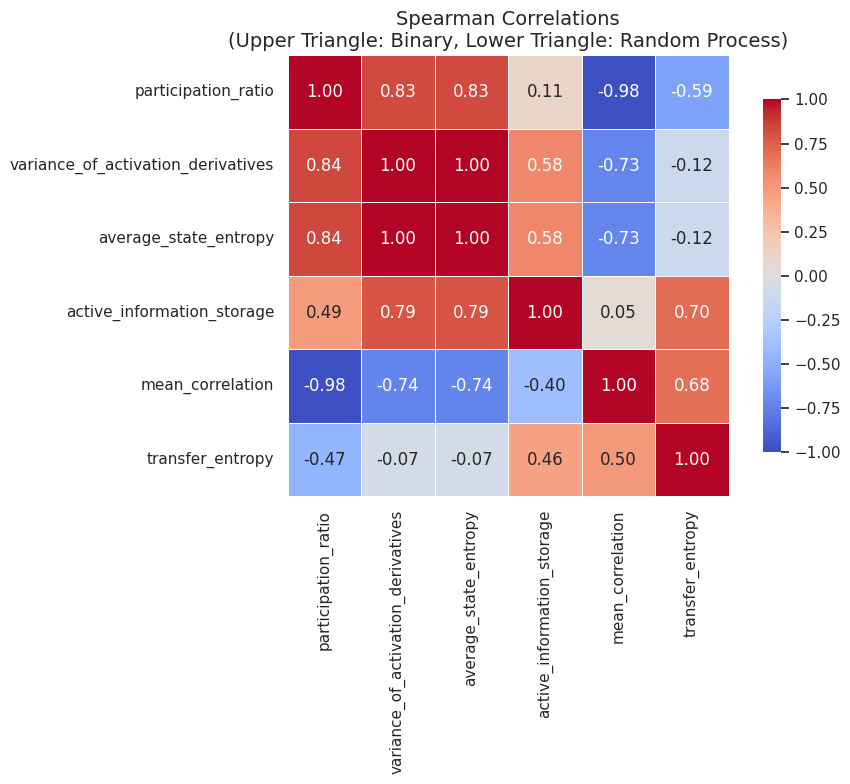

Triangle scatterplot saved to THESIS_FIGURES/4_triangle_measures_binary_vs_rp_pearson.png


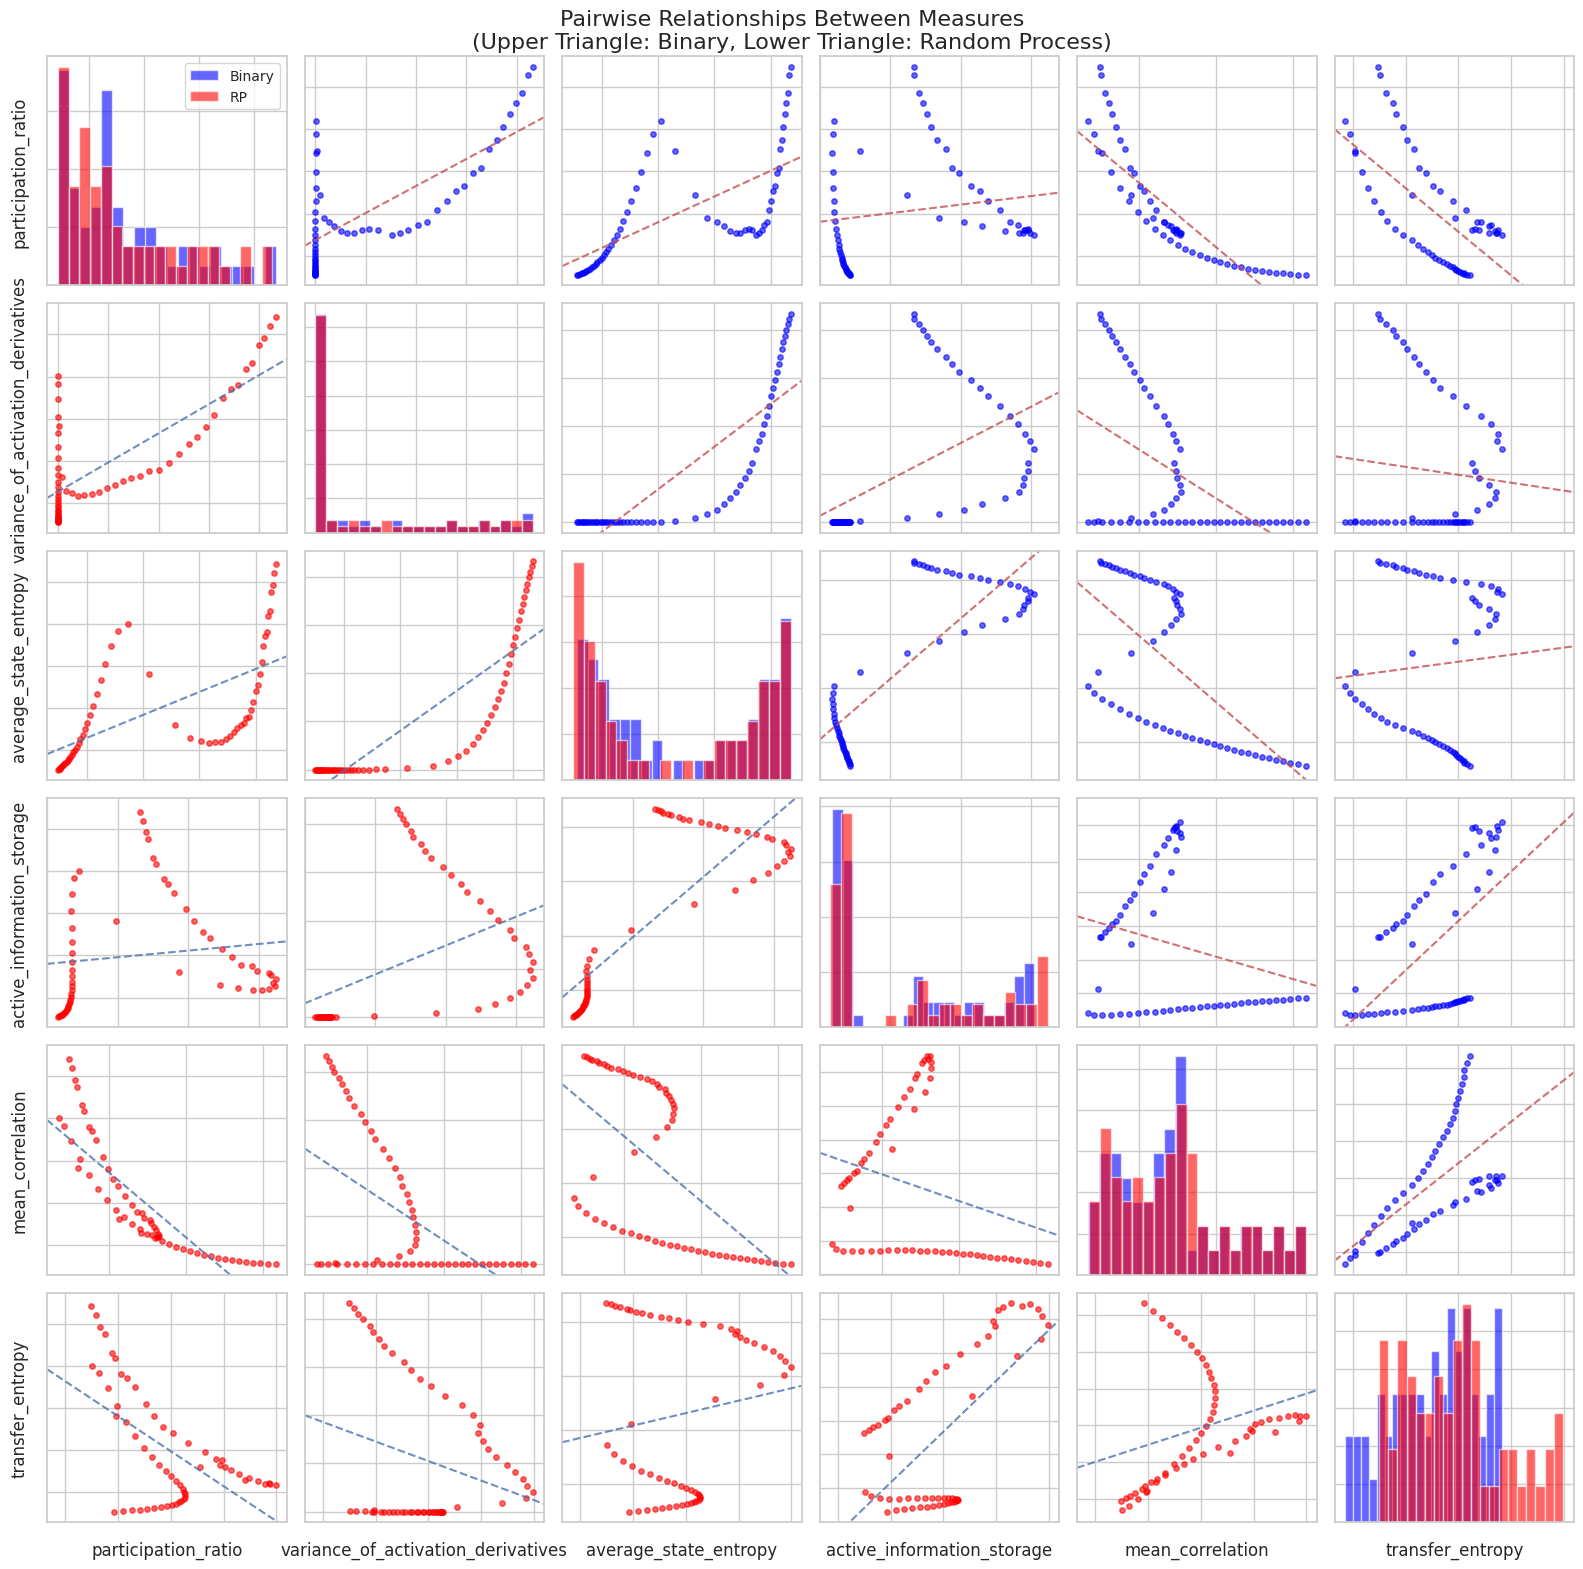

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
import os

# Load the CSVs
df_binary_raw = pd.read_csv("../THESIS_CSV/ALL_MEASURES_CORR_BINARY.csv")
df_rp_raw = pd.read_csv("../THESIS_CSV/ALL_MEASURES_CORR_RP.csv")

# Select only the measure columns
measure_cols = [
    'participation_ratio', 
    'variance_of_activation_derivatives', 
    'average_state_entropy', 
    'active_information_storage', 
    'mean_correlation', 
    'transfer_entropy'
]

# Average across trials for each spectral radius
df_binary = df_binary_raw.groupby('spectral_radius')[measure_cols].mean().reset_index()
df_rp = df_rp_raw.groupby('spectral_radius')[measure_cols].mean().reset_index()

# --- 1. Combined Correlation Matrix ---
# Compute Spearman correlations
corr_binary = df_binary[measure_cols].corr(method='spearman')
corr_rp = df_rp[measure_cols].corr(method='spearman')

# Create combined correlation matrix
# Upper triangle: Binary, Lower triangle: Random Process
combined_corr = np.triu(corr_binary, k=1) + np.tril(corr_rp, k=0)

# Convert to DataFrame for proper labeling
combined_corr_df = pd.DataFrame(combined_corr, 
                                index=corr_binary.index, 
                                columns=corr_binary.columns)

# Plot the combined correlation matrix
plt.figure(figsize=(10, 8))
mask = np.zeros_like(combined_corr_df, dtype=bool)
sns.heatmap(combined_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Spearman Correlations\n(Upper Triangle: Binary, Lower Triangle: Random Process)", 
          fontsize=14)

# Remove the corner text annotations

plt.tight_layout()
#plt.savefig("THESIS_FIGURES/4_combined_correlation_matrix_pearson.png", dpi=300, bbox_inches='tight')
plt.savefig("THESIS_FIGURES/4_combined_correlation_matrix_spearman.pdf", dpi=300, bbox_inches='tight')
plt.show()

# --- 2. Pairwise Triangle Scatterplot ---
def plot_triangle_measures(df_binary, df_rp, measures=measure_cols, output_dir="THESIS_FIGURES"):
    n = len(measures)
    
    # Precompute limits for consistent axes
    measure_limits = {}
    for m in measures:
        combined = pd.concat([df_binary[m], df_rp[m]])
        margin = 0.05 * (combined.max() - combined.min())
        if margin == 0:  # avoid zero margin
            margin = 0.1
        measure_limits[m] = (combined.min() - margin, combined.max() + margin)
    
    fig, axes = plt.subplots(n, n, figsize=(16,16))
    
    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            m_i = measures[i]
            m_j = measures[j]
            
            # Diagonal: histograms
            if i == j:
                ax.hist(df_binary[m_i], alpha=0.6, color='blue', bins=20, density=True, label='Binary')
                ax.hist(df_rp[m_i], alpha=0.6, color='red', bins=20, density=True, label='RP')
                ax.set_xlim(measure_limits[m_i])
                if i == 0:
                    ax.legend(fontsize=10)
            
            # Upper triangle: Binary scatter
            elif i < j:
                ax.scatter(df_binary[m_j], df_binary[m_i], color='blue', s=15, alpha=0.6)
                ax.set_xlim(measure_limits[m_j])
                ax.set_ylim(measure_limits[m_i])
                # Regression line
                if len(df_binary[m_j]) > 1:
                    z = np.polyfit(df_binary[m_j], df_binary[m_i], 1)
                    p = np.poly1d(z)
                    ax.plot([measure_limits[m_j][0], measure_limits[m_j][1]], 
                            p([measure_limits[m_j][0], measure_limits[m_j][1]]), 'r--', alpha=0.8)
            
            # Lower triangle: Random Process scatter
            else:
                ax.scatter(df_rp[m_i], df_rp[m_j], color='red', s=15, alpha=0.6)
                ax.set_xlim(measure_limits[m_i])
                ax.set_ylim(measure_limits[m_j])
                # Regression line
                if len(df_rp[m_i]) > 1:
                    z = np.polyfit(df_rp[m_i], df_rp[m_j], 1)
                    p = np.poly1d(z)
                    ax.plot([measure_limits[m_i][0], measure_limits[m_i][1]], 
                            p([measure_limits[m_i][0], measure_limits[m_i][1]]), 'b--', alpha=0.8)
            
            # Axis labels
            if i == n-1:
                ax.set_xlabel(m_j, fontsize=12)
            if j == 0:
                ax.set_ylabel(m_i, fontsize=12)
            
            # Remove all tick labels and ticks for cleaner look
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.tick_params(left=False, bottom=False)
    
    # Add title to the entire figure
    fig.suptitle("Pairwise Relationships Between Measures\n(Upper Triangle: Binary, Lower Triangle: Random Process)", 
                 fontsize=16, y=0.98)
    
    plt.tight_layout()
    
    # Save figure
    output_dir = "THESIS_FIGURES"
    os.makedirs(output_dir, exist_ok=True)
    out_path = os.path.join(output_dir, "4_triangle_measures_binary_vs_rp_pearson.png")
    #plt.savefig(out_path, dpi=150, bbox_inches='tight')
    out_path_pdf = os.path.join(output_dir, "4_triangle_measures_binary_vs_rp_pearson.pdf")
    plt.savefig(out_path_pdf, bbox_inches='tight')

    print(f"Triangle scatterplot saved to {out_path}")
    plt.show()

# Call the plotting function
plot_triangle_measures(df_binary, df_rp)

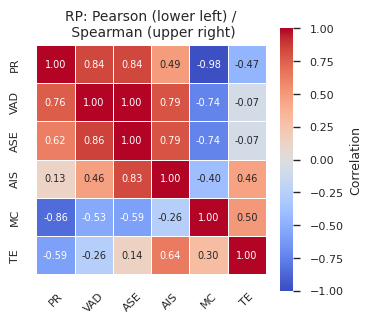

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ------------------ Config ------------------
measure_cols = [
    "participation_ratio",
    "variance_of_activation_derivatives",
    "average_state_entropy",
    "active_information_storage",
    "mean_correlation",
    "transfer_entropy",
]
display_labels = {
    "participation_ratio": "PR",
    "variance_of_activation_derivatives": "VAD",
    "average_state_entropy": "ASE",
    "active_information_storage": "AIS",
    "mean_correlation": "MC",
    "transfer_entropy": "TE",
}
outdir = "PRESENTATION"
outfile = "4_rp_only_corr_matrix_pearsonLower_spearmanUpper.pdf"
os.makedirs(outdir, exist_ok=True)

# ------------------ Load & aggregate (RP only) ------------------
df_rp_raw = pd.read_csv("../THESIS_CSV/ALL_MEASURES_CORR_RP.csv")
# Average across trials at each spectral radius
df_rp = df_rp_raw.groupby("spectral_radius", as_index=False)[measure_cols].mean()

# ------------------ Build combined matrix (RP only) ------------------
# Pearson (lower-left incl. diagonal), Spearman (upper-right excl. diagonal)
corr_pearson  = df_rp[measure_cols].corr(method="pearson")
corr_spearman = df_rp[measure_cols].corr(method="spearman")

combined = np.tril(corr_pearson, k=0) + np.triu(corr_spearman, k=1)
combined_df = pd.DataFrame(combined, index=measure_cols, columns=measure_cols)

# Relabel axes with short names
combined_df.index   = [display_labels[m] for m in combined_df.index]
combined_df.columns = [display_labels[m] for m in combined_df.columns]

# ------------------ Plot: single heatmap ------------------
sns.set_context("paper")
sns.set_style("white")

fig, ax = plt.subplots(1, 1, figsize=(3.8, 3.4), constrained_layout=False)

vmin, vmax = -1.0, 1.0
cmap = "coolwarm"

h = sns.heatmap(
    combined_df, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax,
    square=True, cbar=True, linewidths=0.4, linecolor="white",
    annot=True, fmt=".2f", annot_kws={"fontsize": 7}
)

ax.set_title(
    "RP: Pearson (lower left) /\n Spearman (upper right)",
    fontsize=10, pad=6
)
ax.set_xlabel("")
ax.set_ylabel("")

# Tick formatting
ax.tick_params(axis="x", labelrotation=45, labelsize=8)
ax.tick_params(axis="y", labelsize=8)

# Colorbar label
cbar = h.collections[0].colorbar
cbar.set_label("Correlation", fontsize=9)
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
fig.savefig(os.path.join(outdir, outfile), bbox_inches="tight")  # vector PDF
# Optional PNG for quick previews:
#fig.savefig(os.path.join(outdir, outfile.replace(".pdf")), dpi=300, bbox_inches="tight")
plt.show()


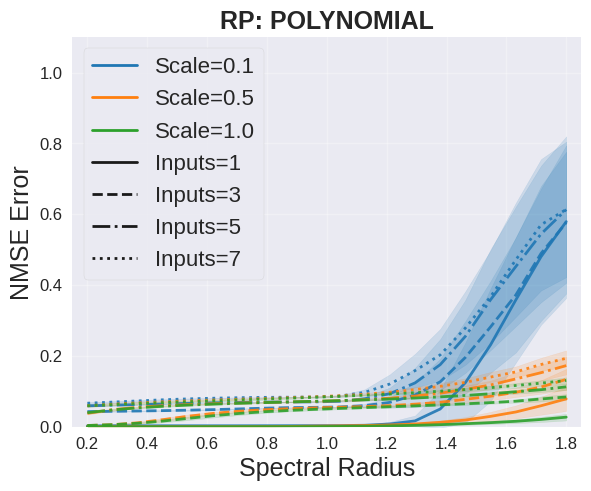

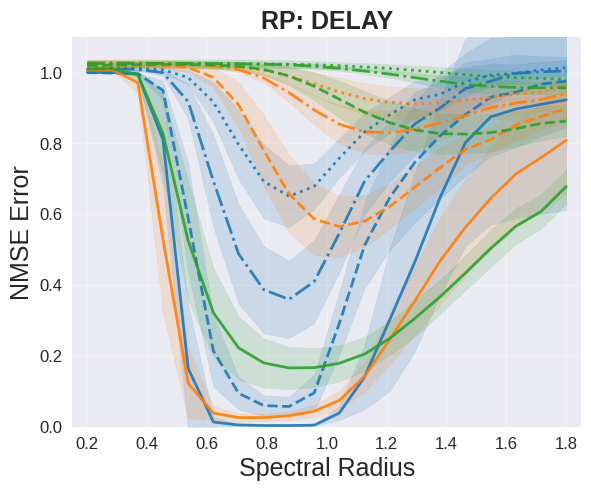

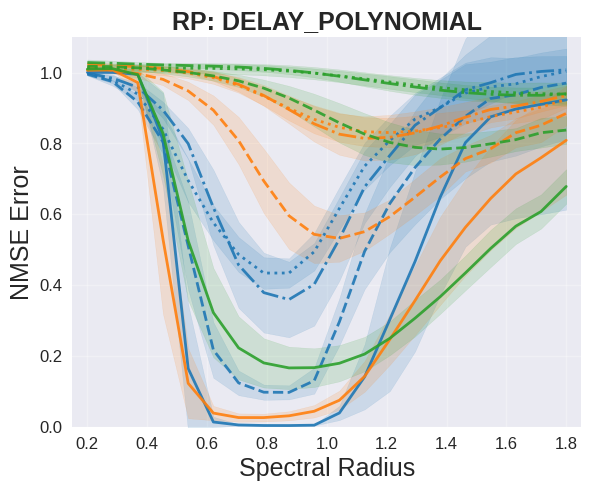

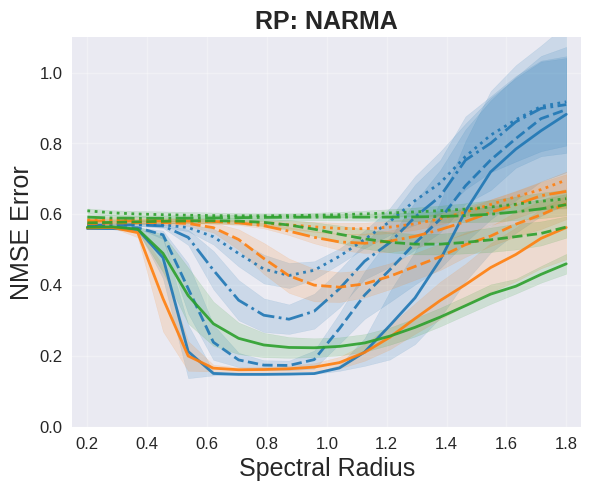

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Load CSV (RP only) ---
df_rp = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_RP_THESIS.csv")

# --- Ensure output folder exists ---
OUT_DIR = "PRESENTATION"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Plot settings ---
plt.style.use('seaborn-v0_8')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # scale colors
linestyles = ['-', '--', '-.', ':']         # input/process count
scales = [0.1, 0.5, 1.0]
process_counts = [1, 3, 5, 7]

# Desired order for RP tasks
rp_task_order = ['polynomial', 'delay', 'delay_polynomial', 'narma']

# --- Plotting function ---
def plot_task(ax, df_task, title, show_xlabel=True, remove_ylabel=False):
    for s_idx, scale in enumerate(scales):
        for p_idx, proc_count in enumerate(process_counts):
            mask = (df_task['scale'] == scale) & (df_task['process_count'] == proc_count)
            data_subset = df_task[mask]

            if len(data_subset) == 0:
                continue

            grouped = data_subset.groupby('spectral_radius')['nmse_error'].agg(['mean', 'std']).reset_index()

            ax.plot(grouped['spectral_radius'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=2.0, alpha=0.9)

            ax.fill_between(grouped['spectral_radius'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)

    # Formatting
    ax.set_title(title, fontsize=18, fontweight='bold')

    if show_xlabel:
        ax.set_xlabel('Spectral Radius', fontsize=18)
    else:
        ax.set_xlabel('')

    if not remove_ylabel:
        ax.set_ylabel('NMSE Error', fontsize=18)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.85)
    ax.set_ylim(0, 1.1)

# --- Loop through tasks (RP only) ---
for i, task in enumerate(rp_task_order):
    # Single subplot per task
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))

    # RP task
    df_task_rp = df_rp[df_rp['task'] == task].copy()
    plot_task(ax, df_task_rp, f'RP: {task.upper()}', show_xlabel=True, remove_ylabel=False)

    # --- Legend inside subplot (only on first figure to avoid repetition) ---
    if i == 0:
        color_legend = [Line2D([0], [0], color=colors[j], lw=2, label=f'Scale={scale}')
                        for j, scale in enumerate(scales)]
        line_legend = [Line2D([0], [0], color='k', lw=2, linestyle=linestyles[j], label=f'Inputs={proc_count}')
                       for j, proc_count in enumerate(process_counts)]
        ax.legend(handles=color_legend + line_legend, loc='upper left',
                  fontsize=16, frameon=True)

    plt.tight_layout()

    # Save each task separately (PRESENTATION folder)
    base = f"ESN_NMSE_{task.upper()}_RP"
    plt.savefig(os.path.join(OUT_DIR, f"{base}.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(OUT_DIR, f"{base}.pdf"), dpi=300, bbox_inches='tight')
    plt.show()


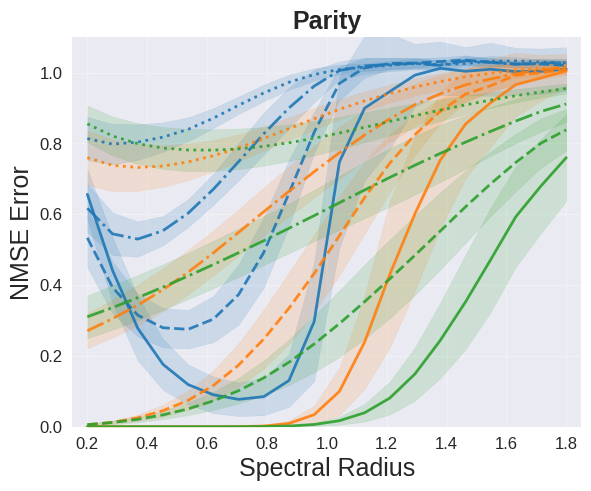

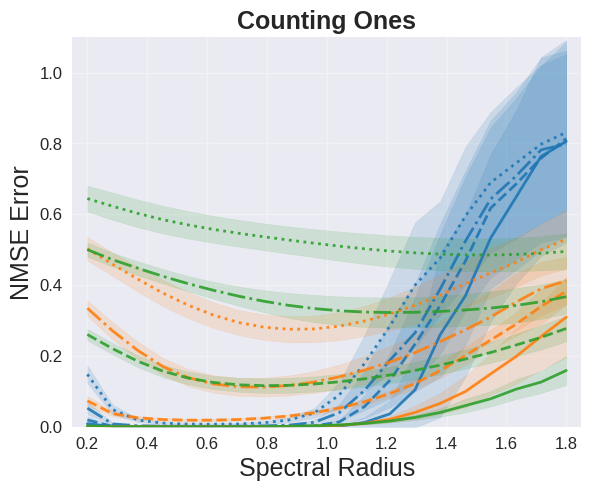

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load CSV ---
df_binary = pd.read_csv("../THESIS_CSV/ALL_TASKS_NMSE_BINARY_THESIS.csv")

# --- Ensure output folder exists ---
OUT_DIR = "PRESENTATION"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Plot settings ---
plt.style.use('seaborn-v0_8')
binary_tasks = ["parity", "counting_task"]
task_titles = {"parity": "Parity", "counting_task": "Counting Ones"}

scales = [0.1, 0.5, 1.0]
process_counts = [1, 3, 5, 7]  # matches input_dim / process_count
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # scale colors
linestyles = ['-', '--', '-.', ':']         # input/process count

# --- Plotting function ---
def plot_binary_task(ax, df_task, title, remove_ylabel=False):
    for s_idx, scale in enumerate(scales):
        for p_idx, proc_count in enumerate(process_counts):
            df_subset = df_task[(df_task['scale'] == scale) & (df_task['process_count'] == proc_count)]
            if len(df_subset) == 0:
                continue

            grouped = df_subset.groupby('spectral_radius')['nmse_error'].agg(['mean','std']).reset_index()

            ax.plot(grouped['spectral_radius'], grouped['mean'],
                    color=colors[s_idx], linestyle=linestyles[p_idx],
                    linewidth=2.0, alpha=0.9)

            ax.fill_between(grouped['spectral_radius'],
                            grouped['mean'] - grouped['std'],
                            grouped['mean'] + grouped['std'],
                            color=colors[s_idx], alpha=0.15)

    # Formatting
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel('Spectral Radius', fontsize=18)

    if not remove_ylabel:
        ax.set_ylabel('NMSE Error', fontsize=18)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.85)
    ax.set_ylim(0, 1.1)

# --- Split: one figure per task (no legend) ---
for task in binary_tasks:
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    df_task = df_binary[df_binary['task'] == task]
    plot_binary_task(ax, df_task, task_titles[task], remove_ylabel=False)

    plt.tight_layout()

    base = f"ESN_NMSE_{task.upper()}_BINARY"
    plt.savefig(os.path.join(OUT_DIR, f"{base}.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(OUT_DIR, f"{base}.pdf"), dpi=300, bbox_inches='tight')
    plt.show()


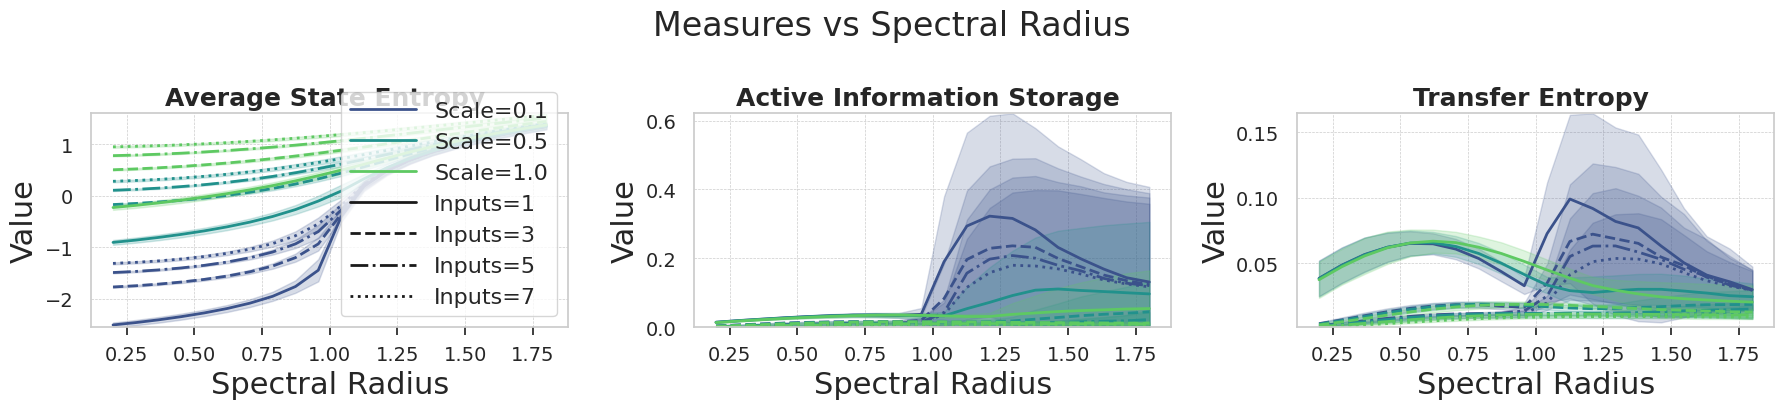

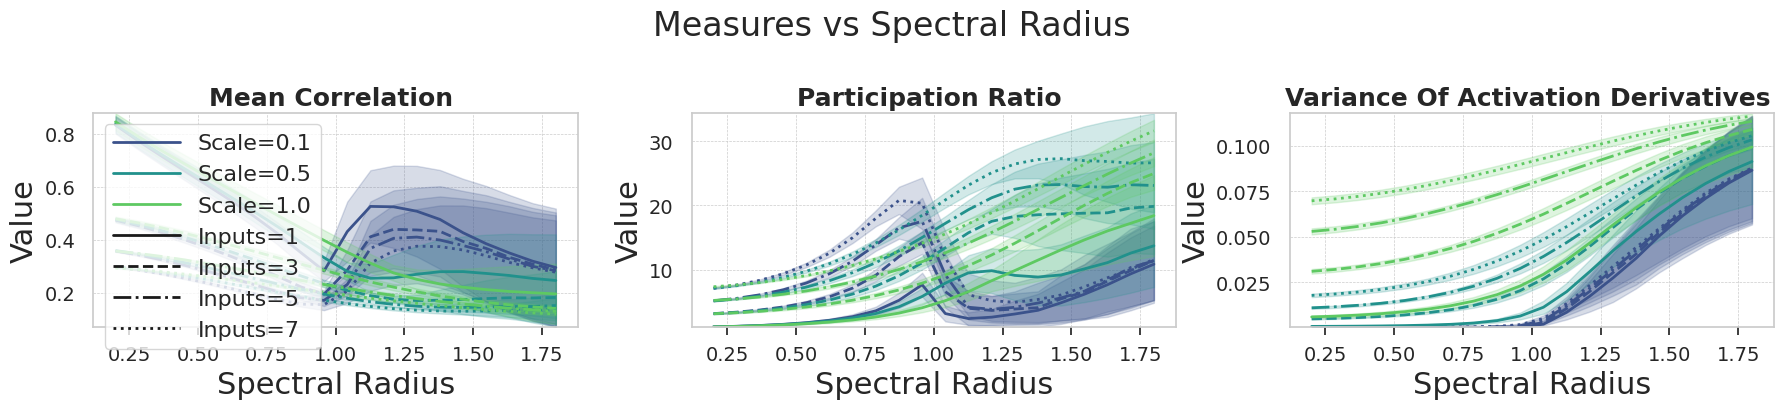

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import numpy as np

# --- Font constants for thesis figures ---
TITLE_FONTSIZE = 18
LABEL_FONTSIZE = 22  # Increased font size for x and y labels
TICK_FONTSIZE = 14
LEGEND_FONTSIZE = 16

def plot_measure_block(csv_file_rp, measures, block_name, location="upper left"):
    # --- Load RP only ---
    df_rp = pd.read_csv(csv_file_rp)

    # --- Extract axes values from RP ---
    scales = sorted(df_rp['scale'].unique())
    process_counts = sorted(df_rp['process_count'].unique())
    spectral_radii = sorted(df_rp['spectral_radius'].unique())  # kept if needed elsewhere

    # --- Style ---
    palette = sns.color_palette("viridis", n_colors=len(scales))
    line_styles = ['-', '--', '-.', ':']

    sns.set_theme(style="whitegrid")
    n_measures = len(measures)

    # 1x3 layout (1 row, columns = measures)
    # 1x3 layout (same plot, slightly narrower)
    PANEL_W = 6   # was 8
    PANEL_H = 4
    fig, axes = plt.subplots(1, n_measures, figsize=(n_measures * PANEL_W, PANEL_H), sharex=True)
    plt.subplots_adjust(wspace=0.25)  # small spacing between panels

    # Ensure axes is iterable
    if n_measures == 1:
        axes = [axes]
    else:
        axes = np.ravel(axes)

    for i, measure in enumerate(measures):
        ax = axes[i]

        grouped = df_rp.groupby(['process_count', 'scale', 'spectral_radius'])
        df_mean = grouped[measure].mean().reset_index()
        df_std  = grouped[measure].std().reset_index()

        # Compute y-lims consistently across lines for this measure
        measure_min = float('inf')
        measure_max = float('-inf')

        for scale_idx, scale in enumerate(scales):
            for pc_idx, process_count in enumerate(process_counts):
                subset_mean = df_mean[(df_mean['scale'] == scale) & (df_mean['process_count'] == process_count)]
                subset_std  = df_std[(df_std['scale'] == scale) & (df_std['process_count'] == process_count)]

                if subset_mean.empty:
                    continue

                ax.plot(
                    subset_mean['spectral_radius'], subset_mean[measure],
                    color=palette[scale_idx],
                    linestyle=line_styles[pc_idx % len(line_styles)],
                    linewidth=2.0
                )

                if measure == 'average_state_entropy':
                    lower = subset_mean[measure] - subset_std[measure]
                else:
                    lower = np.maximum(subset_mean[measure] - subset_std[measure], 0)
                upper = subset_mean[measure] + subset_std[measure]

                ax.fill_between(
                    subset_mean['spectral_radius'], lower, upper,
                    color=palette[scale_idx], alpha=0.2
                )

                # Track bounds
                measure_min = min(measure_min, np.nanmin(lower))
                measure_max = max(measure_max, np.nanmax(upper))

        # Formatting
        ax.set_title(f"{measure.replace('_',' ').title()} ", fontsize=TITLE_FONTSIZE, fontweight='bold')
        ax.set_ylabel("Value", fontsize=LABEL_FONTSIZE)
        ax.set_xlabel("Spectral Radius", fontsize=LABEL_FONTSIZE)  # single row → label each panel
        ax.tick_params(axis='both', labelsize=TICK_FONTSIZE)
        ax.grid(True, linestyle='--', linewidth=0.5)

        # Apply consistent y-lims for this measure
        if np.isfinite(measure_min) and np.isfinite(measure_max) and measure_min < measure_max:
            ax.set_ylim(measure_min, measure_max)

        # Ensure x-ticks are visible
        ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)

    # --- Legend (scales + process counts) on the first subplot ---
    color_legend = [mlines.Line2D([], [], color=palette[k], lw=2, label=f'Scale={s}')
                    for k, s in enumerate(scales)]
    line_legend = [mlines.Line2D([], [], color='k', lw=2,
                                 linestyle=line_styles[k % len(line_styles)],
                                 label=f'Inputs={pc}')
                   for k, pc in enumerate(process_counts)]
    axes[0].legend(handles=color_legend + line_legend, loc=location,
                   fontsize=LEGEND_FONTSIZE, frameon=True, handlelength=3)

    fig.suptitle("Measures vs Spectral Radius", fontsize=24, y=1.02)
    plt.tight_layout()

    out_dir = "PRESENTATION"
    os.makedirs(out_dir, exist_ok=True)
    png_path = os.path.join(out_dir, f"1_3{block_name}_MEASURES_1_horizontal.png")
    pdf_path = os.path.join(out_dir, f"1_3{block_name}_MEASURES_1_horizontal.pdf")
    fig.savefig(png_path, dpi=300, bbox_inches='tight')
    fig.savefig(pdf_path, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    csv_file_rp = "../THESIS_CSV/ALL_MEASURES_RP.csv"

    block1_measures = ['average_state_entropy', 'active_information_storage', 'transfer_entropy']
    block2_measures = ['mean_correlation', 'participation_ratio', 'variance_of_activation_derivatives']

    # Two separate 1x3 plots
    plot_measure_block(csv_file_rp, block1_measures, "first",  location="lower right")
    plot_measure_block(csv_file_rp, block2_measures, "second", location="upper left")


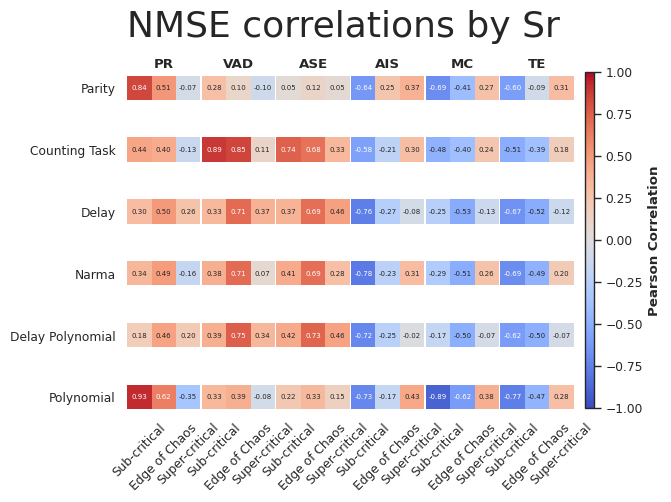

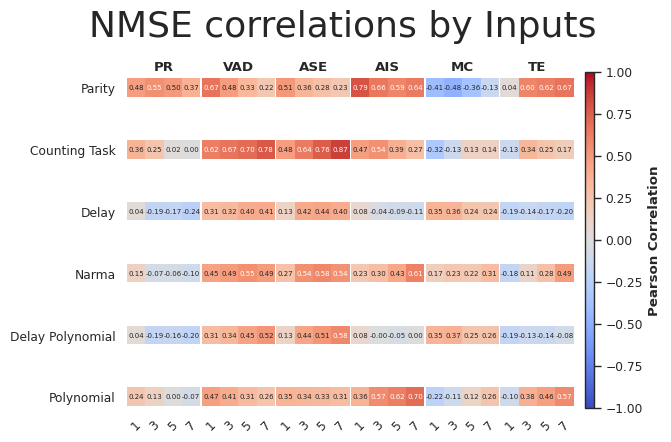

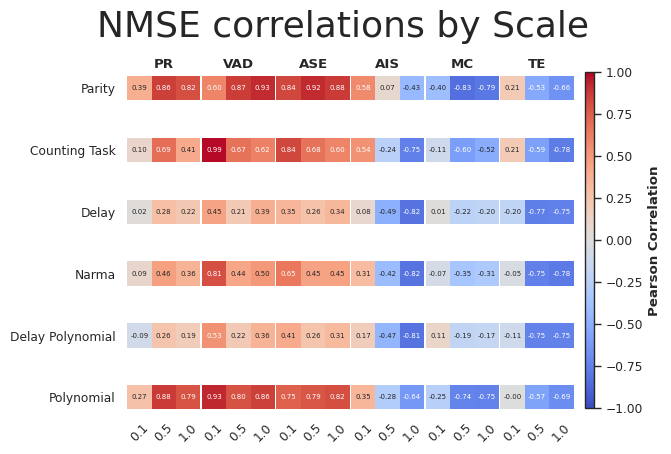

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ------------------ Theme (one place to rule them all) ------------------
THEME = {
    # Figure & saving
    "figure.figsize": (14, 10),
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
    "figure.titlesize": 26,          # add this so suptitle follows theme

    # Fonts & weights
    "font.size": 20,                 # base
    "axes.titlesize": 26,
    "axes.titleweight": "bold",
    "axes.labelsize": 24,
    "axes.labelweight": "bold",
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "legend.frameon": True,

    # Lines/markers/colors
    "lines.linewidth": 2.5,
    "lines.markersize": 6.0,
    "axes.prop_cycle": cycler("color", plt.cm.tab10.colors),

    # Grid
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.6,

    # Heatmap default
    "image.cmap": "viridis_r",
}

# apply everywhere (seaborn + matplotlib)
sns.set_theme(style="white", rc=THEME)
plt.rcParams.update(THEME)

# ------------------ Settings ------------------
CMAP = plt.rcParams["image.cmap"]      # follow theme
VMIN, VMAX = -1.0, 1.0
ANNOT = True

# ------------------ Settings ------------------
CMAP = "coolwarm"
VMIN, VMAX = -1.0, 1.0
ANNOT = True

sns.set_context("paper")
sns.set_style("white")

TASKS_TO_PLOT = ["parity", "counting_task", "delay", "narma", "delay_polynomial", "polynomial"]

MEASURE_ORDER = [
    "participation_ratio",
    "variance_activation_derivatives",
    "average_state_entropy",
    "active_information_storage",
    "mean_correlation",
    "transfer_entropy",
]

DISPLAY_LABELS = {
    "participation_ratio": "PR",
    "variance_activation_derivatives": "VAD",
    "average_state_entropy": "ASE",
    "active_information_storage": "AIS",
    "mean_correlation": "MC",
    "transfer_entropy": "TE",
    "nmse_error": "NMSE",
}

TARGET_COL = "nmse_error"
SPECTRAL_RANGES = {
    "Sub-critical": (0.2, 0.7),
    "Edge of Chaos": (0.7, 1.3),
    "Super-critical": (1.3, 1.8),
}

# ------------------ Helpers ------------------
def _rename_to_caps(df: pd.DataFrame) -> pd.DataFrame:
    col_map = {c: DISPLAY_LABELS.get(c, c) for c in df.columns}
    idx_map = {i: DISPLAY_LABELS.get(i, i) for i in df.index}
    return df.rename(columns=col_map, index=idx_map)

# NEW: aggregate duplicate settings (same ρ, scale, M) to one row (mean over trials)
_AGG_KEYS = ["spectral_radius", "scale", "process_count"]
def _aggregate_by_setting(df: pd.DataFrame, value_cols: list) -> pd.DataFrame:
    cols = list(set(value_cols) | set(_AGG_KEYS))
    df2 = df[cols].dropna()
    return df2.groupby(_AGG_KEYS, as_index=False)[value_cols].mean()

def _compute_corr(df: pd.DataFrame, group_key: str, values: list):
    results = {}
    for val in values:
        sub = df[df[group_key] == val]
        # aggregate duplicates before correlation (only change)
        sub_agg = _aggregate_by_setting(sub, MEASURE_ORDER + [TARGET_COL])
        corr_matrix = sub_agg[MEASURE_ORDER + [TARGET_COL]].corr(method="pearson")
        results[str(val)] = corr_matrix.get(TARGET_COL, pd.Series(np.nan)).drop(TARGET_COL, errors="ignore")
    return pd.DataFrame(results).reindex(MEASURE_ORDER)

def _compute_corr_sr(df: pd.DataFrame):
    results = {}
    for name, (low, high) in SPECTRAL_RANGES.items():
        sub = df[(df['spectral_radius'] >= low) & (df['spectral_radius'] < high)]
        # aggregate duplicates before correlation (only change)
        sub_agg = _aggregate_by_setting(sub, MEASURE_ORDER + [TARGET_COL])
        corr_matrix = sub_agg[MEASURE_ORDER + [TARGET_COL]].corr(method="pearson")
        results[name] = corr_matrix.get(TARGET_COL, pd.Series(np.nan)).drop(TARGET_COL, errors="ignore")
    return pd.DataFrame(results).reindex(MEASURE_ORDER)

# ------------------ Plot ------------------
def plot_condition(df_full, condition: str, storing: str):
    n_tasks = len(TASKS_TO_PLOT)
    n_measures = len(MEASURE_ORDER)

    # scale figure size with font size so big fonts won't overflow tiny tiles
    base = 12.0
    scale = plt.rcParams["font.size"] / base
    fig_w = 1.2 * n_measures * scale
    fig_h = 1.0 * n_tasks * scale

    fig, axes = plt.subplots(
        n_tasks, n_measures,
        figsize=(fig_w, fig_h),
        gridspec_kw=dict(wspace=0.02, hspace=0.02)
    )

    if n_tasks == 1:
        axes = np.array([axes])
    if axes.ndim == 1:
        axes = axes[np.newaxis, :]

    # sizes from theme
    xtick_size = plt.rcParams["xtick.labelsize"]
    ytick_size = plt.rcParams["ytick.labelsize"]
    title_size = plt.rcParams["axes.titlesize"]
    annot_size = plt.rcParams["font.size"] * 0.8  # relative; no rcParam exists for this

    for i, task in enumerate(TASKS_TO_PLOT):
        task_df = df_full[df_full['task'] == task]
        if condition == "sr":
            corr_df = _compute_corr_sr(task_df)
        elif condition == "inputs":
            corr_df = _compute_corr(task_df, "process_count", sorted(task_df['process_count'].unique()))
        elif condition == "scale":
            corr_df = _compute_corr(task_df, "scale", sorted(task_df['scale'].unique()))
        else:
            raise ValueError("Unknown condition")

        corr_df_caps = _rename_to_caps(corr_df)

        for j, measure in enumerate(MEASURE_ORDER):
            ax = axes[i, j]
            val_row = corr_df_caps.loc[DISPLAY_LABELS[measure]].to_frame().T
            small_anot = 5
            sns.heatmap(
                val_row,
                cmap=CMAP, vmin=VMIN, vmax=VMAX,
                square=True, cbar=False,
                annot=ANNOT, fmt=".2f",
                annot_kws={"fontsize": small_anot},
                xticklabels=(i == n_tasks - 1),
                yticklabels=False,
                ax=ax
            )

            # x tick labels only on bottom row → theme sizes
            if i == n_tasks - 1:
                ax.tick_params(axis="x", labelrotation=45, labelsize=xtick_size)

            # titles for top row (use theme size by not overriding)
            if i == 0:
                ax.set_title(DISPLAY_LABELS[measure])  # size from rcParams

            # task names for left column
            if j == 0:
                ax.set_yticks([0.5])
                ax.set_yticklabels([task.replace("_", " ").title()])
                ax.tick_params(axis="y", labelsize=ytick_size)
            else:
                ax.set_yticks([])
                ax.set_yticklabels([])

    # one colorbar (theme sizes)
    cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
    norm = plt.cm.ScalarMappable(cmap=CMAP, norm=plt.Normalize(VMIN, VMAX))
    cb = fig.colorbar(norm, cax=cax)
    cb.set_label("Pearson Correlation")                        # label size from rcParams
    cb.ax.tick_params(labelsize=plt.rcParams["ytick.labelsize"])

    fig.suptitle(f"NMSE correlations by {condition.title()}")  # uses figure.titlesize
    out = os.path.join(storing, f"55nmse_corr_{condition}")
    plt.savefig(out + ".png")  # dpi/bbox from THEME
    plt.savefig(out + ".pdf")
    plt.show()


# ------------------ Main ------------------
if __name__ == "__main__":
    home_dir = "/home/powl/Documents/University/THESIS/reservoir_framework/reservoir/tasks/THESIS_CSV"
    storing = "THESIS_FIGURES"
    os.makedirs(storing, exist_ok=True)

    file_path = os.path.join(home_dir, "ALL_MEASURES_NMSE_CORR_DATA.csv")
    df_full = pd.read_csv(file_path)

    for cond in ["sr", "inputs", "scale"]:
        plot_condition(df_full, cond, storing)
